# Parte 1: AED

## Carga de dataset.

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [5]:
df = pd.read_csv("Online_Retail.csv", encoding='unicode_escape')

In [6]:
df.sample(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
104146,545150,22558,CLOTHES PEGS RETROSPOT PACK 24,12,28/02/2020 12:27,1.49,14227.0,United Kingdom
7906,537065,22726,ALARM CLOCK BAKELIKE GREEN,4,05/12/2019 11:57,3.75,12567.0,France
370631,569147,21915,RED HARMONICA IN BOX,12,30/09/2020 15:33,1.25,12842.0,United Kingdom
26456,538513,22241,GARLAND WOODEN HAPPY EASTER,4,12/12/2019 14:21,1.25,15454.0,United Kingdom
85460,543470,22547,MINI JIGSAW DINOSAUR,24,08/02/2020 14:58,0.42,16951.0,United Kingdom
468370,576463,21832,CHOCOLATE CALCULATOR,1,15/11/2020 11:37,1.65,17974.0,United Kingdom
80244,543028,22954,HEN PARTY CORDON BARRIER TAPE,12,02/02/2020 15:09,1.25,14443.0,United Kingdom
505132,579001,23159,SET OF 5 PANCAKE DAY MAGNETS,3,27/11/2020 16:19,2.08,15555.0,United Kingdom
365041,568691,23188,VINTAGE 2 METER FOLDING RULER,10,28/09/2020 14:47,1.65,NaN,United Kingdom
464021,576076,23309,SET OF 60 I LOVE LONDON CAKE CASES,2,13/11/2020 16:18,0.55,14382.0,United Kingdom


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


## Transformacion de tipo de datos.

In [8]:
df['CUSTOMER_ID'] = df['CUSTOMER_ID'].astype(object)

In [9]:
df['INVOICE_DATE'] = pd.to_datetime(df['INVOICE_DATE'], format="%d/%m/%Y %H:%M")

In [10]:
df['INVOICE_DATE']

0        2019-12-01 08:26:00
1        2019-12-01 08:26:00
2        2019-12-01 08:26:00
3        2019-12-01 08:26:00
4        2019-12-01 08:26:00
                 ...        
541904   2020-12-09 12:50:00
541905   2020-12-09 12:50:00
541906   2020-12-09 12:50:00
541907   2020-12-09 12:50:00
541908   2020-12-09 12:50:00
Name: INVOICE_DATE, Length: 541909, dtype: datetime64[ns]

## Analisis estadistico. 

In [11]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
QUANTITY,541909.0,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
INVOICE_DATE,541909,2020-07-04 08:55:02.927097344,2019-12-01 08:26:00,2020-03-28 11:34:00,2020-07-19 17:17:00,2020-10-19 11:27:00,2020-12-09 12:50:00,NaN
UNIT_PRICE,541909.0,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853


In [12]:
df.select_dtypes('object').describe().T

,count,unique,top,freq
INVOICE_NO,541909,25900,573585,1114
STOCK_CODE,541909,4070,85123A,2313
DESCRIPTION,540455,4214,WHITE HANGING HEART T-LIGHT HOLDER,2369
CUSTOMER_ID,406829.0,4372.0,17841.0,7983.0
REGION,541909,38,United Kingdom,495478


<Axes: xlabel='QUANTITY'>

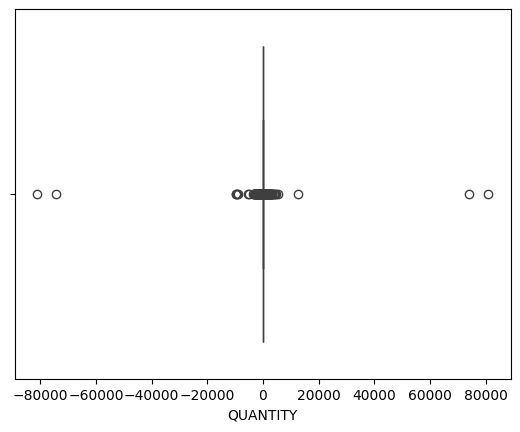

In [13]:
sns.boxplot(x=df['QUANTITY'])

<Axes: xlabel='UNIT_PRICE'>

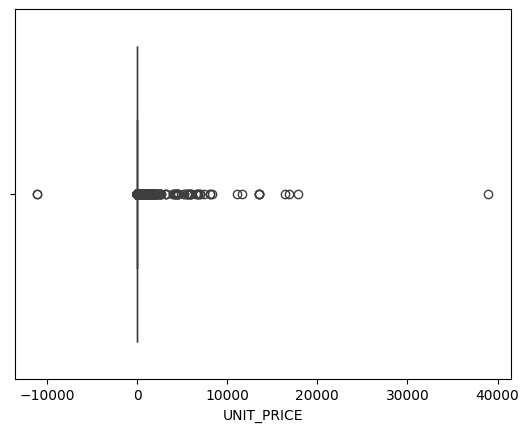

In [14]:
sns.boxplot(x=df['UNIT_PRICE'])

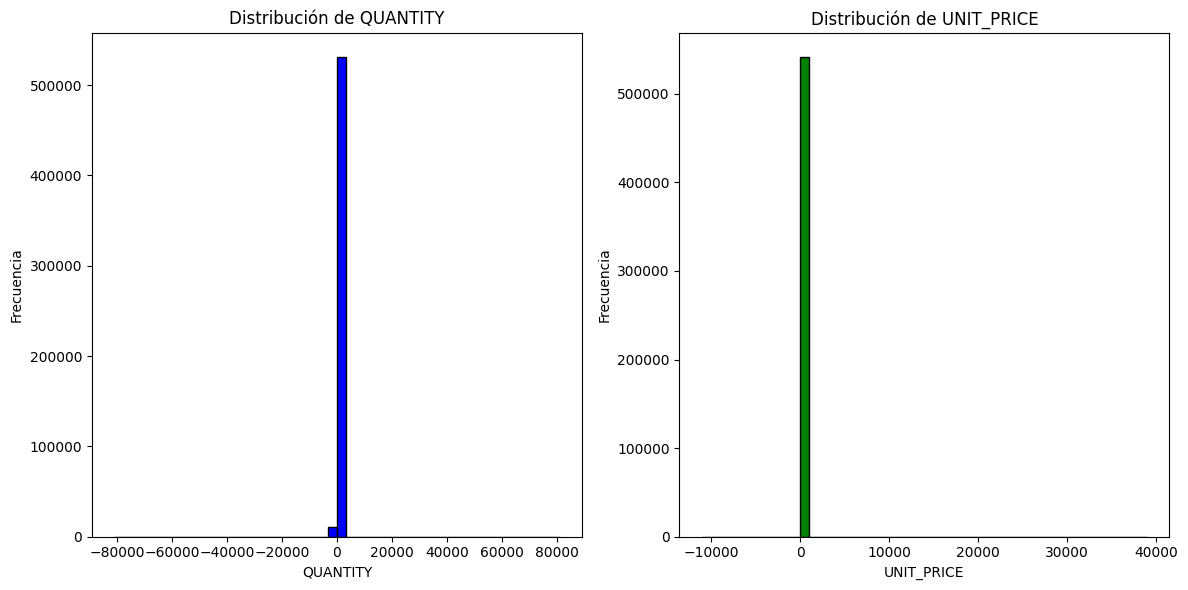

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['QUANTITY'], bins=50, color='blue', edgecolor='black')
plt.title('Distribución de QUANTITY')
plt.xlabel('QUANTITY')
plt.ylabel('Frecuencia')

plt.subplot(1, 2, 2)
plt.hist(df['UNIT_PRICE'], bins=50, color='green', edgecolor='black')
plt.title('Distribución de UNIT_PRICE')
plt.xlabel('UNIT_PRICE')
plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

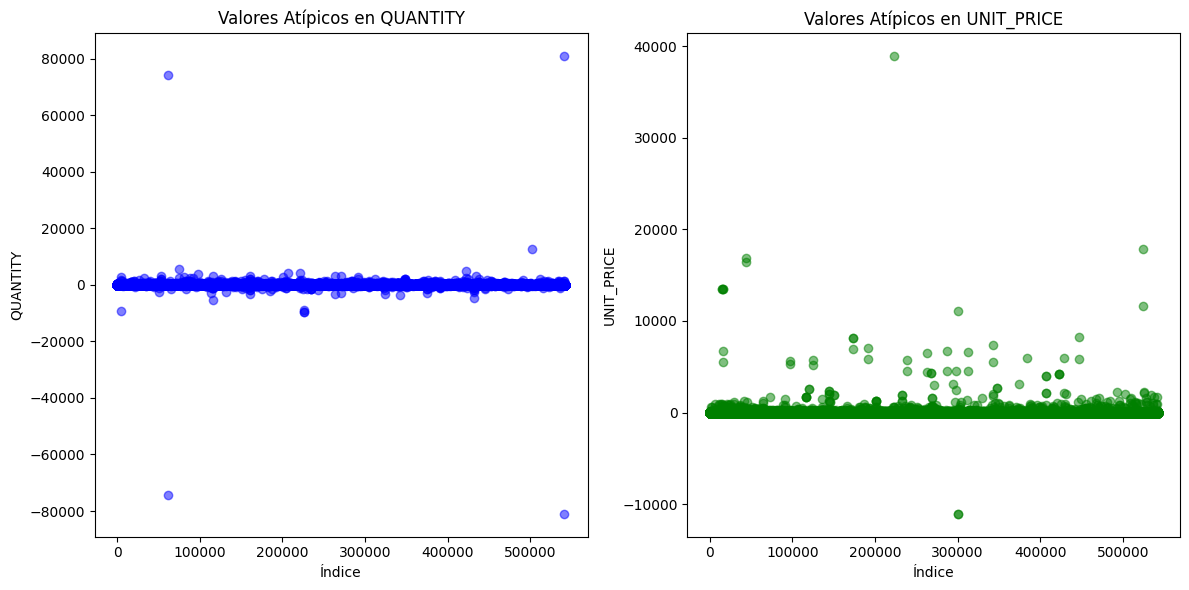

In [16]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(range(len(df)), df['QUANTITY'], alpha=0.5, color='blue')
plt.title('Valores Atípicos en QUANTITY')
plt.xlabel('Índice')
plt.ylabel('QUANTITY')

plt.subplot(1, 2, 2)
plt.scatter(range(len(df)), df['UNIT_PRICE'], alpha=0.5, color='green')
plt.title('Valores Atípicos en UNIT_PRICE')
plt.xlabel('Índice')
plt.ylabel('UNIT_PRICE')

plt.tight_layout()
plt.show()

## Tratamiendo de valores ausentes.

In [17]:
df['DESCRIPTION'] = df['DESCRIPTION'].replace('?', 'unknown')

In [18]:
df['DESCRIPTION'].fillna('unknown', inplace=True)

In [19]:
df[df['DESCRIPTION']=='unknown']

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,2019-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,unknown,1,2019-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,unknown,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,unknown,1,2019-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,unknown,1,2019-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,unknown,-2,2020-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,unknown,15,2020-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,unknown,6,2020-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,unknown,27,2020-12-08 10:33:00,0.0,NaN,United Kingdom


In [20]:
df[df['CUSTOMER_ID'].isna()]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
622,536414,22139,unknown,56,2019-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2019-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2019-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2019-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2019-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2020-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2020-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2020-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2020-12-09 10:26:00,10.79,NaN,United Kingdom


In [21]:
df['CUSTOMER_ID'].fillna('unknown', inplace=True)

In [22]:
df.isna().sum()

INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64

## Tratamiento de duplicados.

In [23]:
df.drop_duplicates().reset_index(drop=True)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
536636,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2020-12-09 12:50:00,0.85,12680.0,France
536637,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2020-12-09 12:50:00,2.10,12680.0,France
536638,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2020-12-09 12:50:00,4.15,12680.0,France
536639,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2020-12-09 12:50:00,4.15,12680.0,France


In [24]:
df.duplicated().sum()

5268

## Seccion APARTE

In [25]:
df[df['QUANTITY'] < -2000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2019-12-02 14:23:00,0.03,15838.0,United Kingdom
50849,540564,22617,mouldy thrown away.,-2600,2020-01-10 10:36:00,0.00,unknown,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2020-01-18 10:17:00,1.04,12346.0,United Kingdom
113580,545990,84598,check,-3000,2020-03-08 13:07:00,0.00,unknown,United Kingdom
115818,546152,72140F,throw away,-5368,2020-03-09 17:25:00,0.00,unknown,United Kingdom
131399,547560,72732,thrown away-can't sell,-2472,2020-03-23 17:28:00,0.00,unknown,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2020-04-18 13:08:00,2.10,15749.0,United Kingdom
185113,552733,23059,Thrown away-rusty,-2376,2020-05-11 10:48:00,0.00,unknown,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2020-06-14 10:36:00,0.00,unknown,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2020-06-14 10:37:00,0.00,unknown,United Kingdom


In [26]:
df[df['QUANTITY'] > 3000]

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-01-11 12:55:00,2.10,15749.0,United Kingdom
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2020-01-18 10:01:00,1.04,12346.0,United Kingdom
74614,542504,37413,unknown,5568,2020-01-28 12:03:00,0.00,unknown,United Kingdom
97432,544612,22053,EMPIRE DESIGN ROSETTE,3906,2020-02-22 10:43:00,0.82,18087.0,United Kingdom
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2020-04-18 13:20:00,2.10,15749.0,United Kingdom
206121,554868,22197,SMALL POPCORN HOLDER,4300,2020-05-27 10:52:00,0.72,13135.0,United Kingdom
220843,556231,85123A,unknown,4000,2020-06-09 15:04:00,0.00,unknown,United Kingdom
263885,560040,23343,came coded as 20713,3100,2020-07-14 14:28:00,0.00,unknown,United Kingdom
270885,560599,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,3186,2020-07-19 17:04:00,0.06,14609.0,United Kingdom
421632,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,4800,2020-10-27 12:26:00,0.21,12901.0,United Kingdom


In [27]:
# VAMOS A BORRAR ESTOS DATOS

# df[(df['UNIT_PRICE'] == 0) & (df['DESCRIPTION'] == 'unknown') & (df['CUSTOMER_ID'] == 'unknown')].dropna(inplace=True).reset_index(drop=True)

## Segmentacion por clusteres.

In [28]:
data_positive_quantity = df.copy()

# Calcular el gasto total por cliente usando .loc para evitar SettingWithCopyWarning
data_positive_quantity.loc[:, 'TOTAL_SPENT'] = data_positive_quantity['QUANTITY'] * data_positive_quantity['UNIT_PRICE']

# Agrupar por 'CUSTOMER_ID' y calcular el gasto total y la cantidad total comprada
customer_data = data_positive_quantity.groupby('CUSTOMER_ID').agg(
    TOTAL_SPENT=pd.NamedAgg(column='TOTAL_SPENT', aggfunc='sum'),
    TOTAL_QUANTITY=pd.NamedAgg(column='QUANTITY', aggfunc='sum')
).reset_index()

# Mostrar los primeros registros del DataFrame para verificar
print(customer_data.head())

  CUSTOMER_ID  TOTAL_SPENT  TOTAL_QUANTITY
0     12346.0         0.00               0
1     12347.0      4310.00            2458
2     12348.0      1797.24            2341
3     12349.0      1757.55             631
4     12350.0       334.40             197


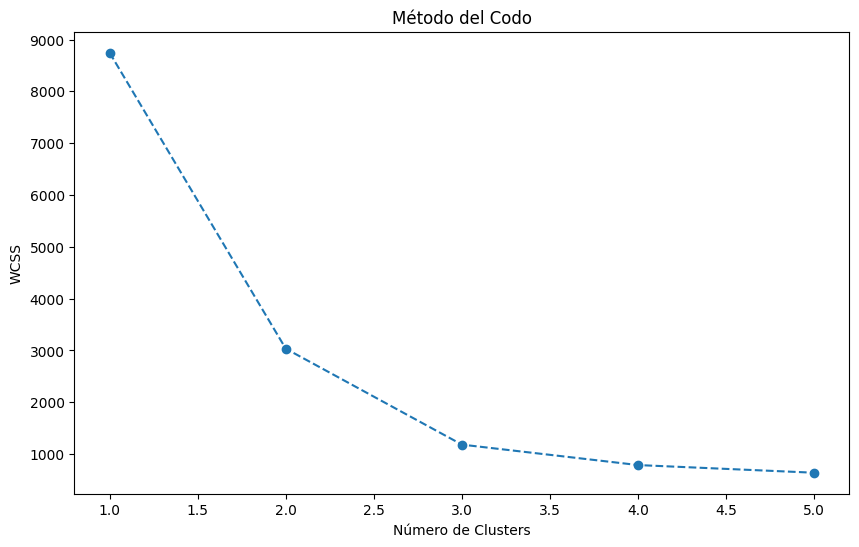

In [29]:

# Seleccionar las características para la segmentación
features = customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Determinar el número óptimo de clusters utilizando el método del codo con un rango reducido
wcss = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

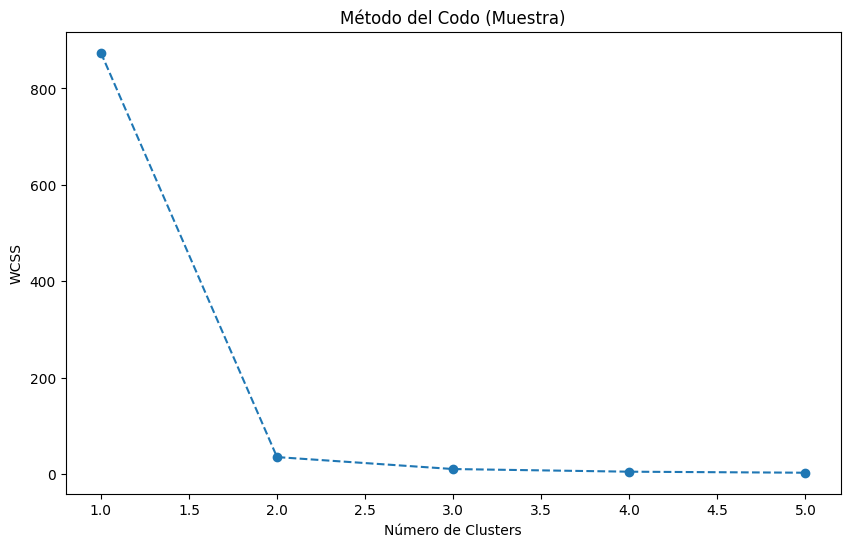

In [30]:
# Tomar una muestra del 10% del dataset de clientes para reducir la carga computacional
sampled_customer_data = customer_data.sample(frac=0.1, random_state=42)

# Seleccionar las características para la segmentación
features_sampled = sampled_customer_data[['TOTAL_SPENT', 'TOTAL_QUANTITY']]

# Estandarizar los datos
features_sampled_scaled = scaler.fit_transform(features_sampled)

# Determinar el número óptimo de clusters utilizando el método del codo con la muestra
wcss_sampled = []
for i in range(1, 6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features_sampled_scaled)
    wcss_sampled.append(kmeans.inertia_)

# Graficar el método del codo con el rango reducido y la muestra
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), wcss_sampled, marker='o', linestyle='--')
plt.title('Método del Codo (Muestra)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


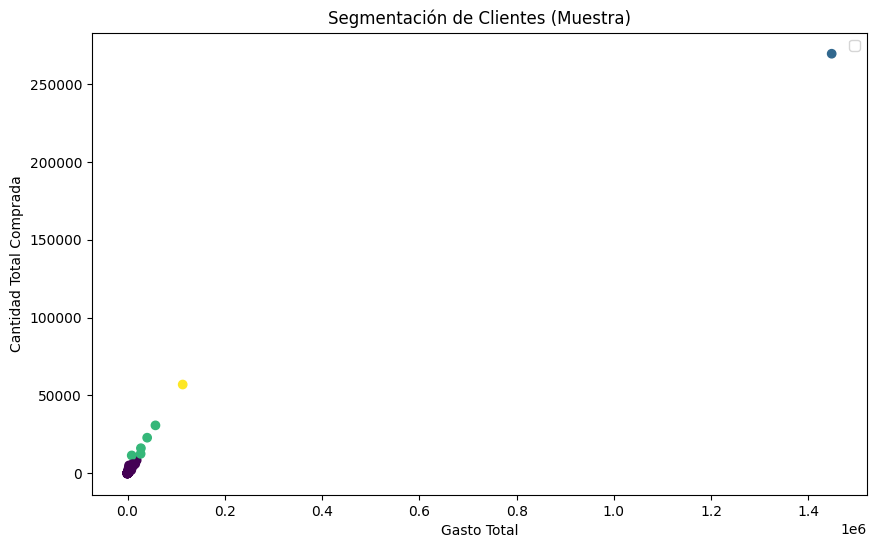

In [33]:
# Aplicar K-means con 3 clusters a la muestra de datos
kmeans = KMeans(n_clusters=4, random_state=42)
sampled_customer_data['CLUSTER'] = kmeans.fit_predict(features_sampled_scaled)

# Visualizar los resultados
plt.figure(figsize=(10, 6))
plt.scatter(sampled_customer_data['TOTAL_SPENT'], sampled_customer_data['TOTAL_QUANTITY'], c=sampled_customer_data['CLUSTER'], cmap='viridis')
plt.title('Segmentación de Clientes (Muestra)')
plt.xlabel('Gasto Total')
plt.ylabel('Cantidad Total Comprada')
plt.show()